In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

In [3]:
geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

27 - 39 rows for Vilo

In [5]:
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,worry,harm_personally,harm_US,harm_dev_countries,harm_future_gen,harm_plants_animals,when_harm_US,reg_CO2_pollutant,reg_utilities,fund_research,reg_coal_emissions,discuss_GW,hear_GW_media,gender,age,age_category,generation,educ,educ_category,income,income_category,race,ideology,party,party_w_leaners,party_x_ideo,registered_voter,region9,region4,religion,religion_other_nonchristian,evangelical,service_attendance,marit_status,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.294402,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,Somewhat worried,Only a little,A moderate amount,A great deal,A great deal,A great deal,In 10 years,Strongly support,Strongly support,Strongly support,NaN,Occasionally,NaN,Female,78.0,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,High school,"$50,000 to $59,999","$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,No,Once a week,Widowed,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.463411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,Not very worried,Only a little,Refused,Only a little,A moderate amount,A moderate amount,In 50 years,Somewhat support,Somewhat support,Somewhat support,NaN,Rarely,NaN,Male,45.0,35-54 years,Baby Boomers (1946 - 1964),10th grade,Less than high school,"$30,000 to $34,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,No party/Not interested in politics,No Party/Not Interested in politics,Not registered,East-North Central,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,Don't Know,Once a year or less,Never married,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.267143,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,Not at all worried,Not at all,Not at all,Not at all,Not at all,Not at all,Never,Somewhat oppose,Strongly oppose,Strongly oppose,NaN,Never,NaN,Female,54.0,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,Bachelor's degree or higher,"$30,000 to $34,999","Less than $50,000",Hispanic,Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,Mountain,West,Mormon,,No,Once a week,Married,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.158105,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,Somewhat worried,Only a little,Only a little,A moderate amount,A moderate amount,A moderate amount,In 25 years,Somewhat support,Strongly support,Strongly support,NaN,Rarely,NaN,Male,71.0,55+ years,Silent (1928 - 1945),Master's degree,Bachelor's degree or higher,"$100,000 to $124,999","$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,No,Once a year or less,Married,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.703294

In [6]:
responses = pd.DataFrame(df.columns[range(26,38)])

In [7]:
df['happening'].value_counts()

Yes           14915
Don't know     3818
No             3612
Refused          71
Name: happening, dtype: int64

In [8]:
df.groupby(['year']).mean()

,case_ID,weight_wave,weight_aggregate,age,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus
year,,,,,,,,,,
2008,1216.663586,0.999954,0.545164,50.115527,2.462107,0.018484,0.073937,0.177449,0.130314,2.061922
2010,4755.032593,0.999896,1.165104,47.151111,3.105185,0.041481,0.148148,0.337778,0.463704,2.114074
2011,9539.760697,0.999990,1.173908,48.018408,2.830846,0.056219,0.129353,0.239303,0.191045,2.214925
2012,13581.022716,0.999986,1.140427,49.762687,2.721121,0.052682,0.106815,0.200580,0.172547,2.188497
2013,17580.219200,1.000000,1.258443,51.160000,2.597867,0.044800,0.106133,0.189867,0.153067,2.104000
2014,21785.209790,1.000002,1.031286,50.532780,2.597465,0.047203,0.101399,0.171329,0.148164,2.129371
2015,25711.603934,0.999998,0.909978,50.451215,2.662939,0.040879,0.105669,0.203625,0.168916,2.143849
2016,29687.522634,0.999999,0.971019,51.486420,2.636214,0.035802,0.103292,0.178601,0.166255,2.152263
2017,33735.430350,0.999999,0.918124,52.204669,2.621790,0.039300,0.100000,0.175875,0.161089,2.145525


In [9]:
dum_happen = pd.get_dummies(df['happening'])

In [10]:
concat = pd.concat([responses, dum_happen], axis=1)

In [12]:
concat['year'] = df['year']

In [14]:
concat.groupby(['year']).mean()

,Don't know,No,Refused,Yes
year,,,,
2008,0.173752,0.121072,0.004159,0.701017
2010,0.201975,0.210370,0.004938,0.582716
2011,0.190050,0.180597,0.015920,0.613433
2012,0.175930,0.152731,0.004350,0.666989
2013,0.175467,0.182933,0.004267,0.637333
2014,0.173951,0.185315,0.000874,0.639860
2015,0.167759,0.179715,0.000000,0.652526
2016,0.164198,0.128807,0.000000,0.706996
2017,0.156031,0.140467,0.000000,0.703502


In [15]:
df2 = df[['generation', 'educ', 'educ_category', 'income', 'income_category',
          'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
          'registered_voter', 'region9', 'region4']]

In [16]:
df2.describe()

,generation,educ,educ_category,income,income_category,race,ideology,party,party_w_leaners,party_x_ideo,registered_voter,region9,region4
count,22416,22416,22416,22416,22416,22416,22416,22416,22416,22416,22416,22416,22416
unique,6,14,4,21,3,4,6,6,5,7,6,9,4
top,Baby Boomers (1946 - 1964),High school graduate - high school diploma or ...,Bachelor's degree or higher,"$100,000 to $124,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",Democrat,Democrats,Conservative Republican,Registered,South Atlantic,South
freq,9148,6330,7711,2571,8787,16827,8849,7406,9248,5499,18841,4336,7869


In [17]:
df2.isnull().sum()

generation          0
educ                0
educ_category       0
income              0
income_category     0
race                0
ideology            0
party               0
party_w_leaners     0
party_x_ideo        0
registered_voter    0
region9             0
region4             0
dtype: int64

In [18]:
df2_dum = pd.get_dummies(df2)

In [19]:
df2_dum.head()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [20]:
df2.shape

(22416, 13)

In [21]:
dummies = pd.concat([df2_dum, dum_happen], axis=1)

In [22]:
dummies.groupby(['Yes']).mean()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Refused
Yes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.40208,0.238768,0.008399,0.178776,0.161179,0.010799,0.017064,0.023064,0.025730,0.000933,0.002533,0.010532,0.009599,0.088522,0.175043,0.324490,0.075723,0.002400,0.024663,0.219704,0.275430,0.324490,0.091854,0.308226,0.02533,0.109185,0.017198,0.050927,0.032129,0.033596,0.036528,0.042394,0.005333,0.046527,0.005999,0.055326,0.055059,0.085055,0.011332,0.090521,0.106252,0.017598,0.073990,0.076656,0.023064,0.241568,0.347420,0.411012,0.072124,0.080789,0.051060,0.796027,0.331023,0.031862,0.328623,0.061192,0.225303,0.021997,0.141714,0.241301,0.128383,0.041461,0.018264,0.428876,0.164911,0.114785,0.128383,0.018264,0.573657,0.444741,0.114785,0.043594,0.125983,0.117718,0.128383,0.024797,0.022264,0.093854,0.010665,0.033462,0.016931,0.822824,0.168911,0.072124,0.121184,0.078923,0.043061,0.131982,0.192374,0.082656,0.108785,0.251566,0.164245,0.373284,0.210905,0.508999,0.481536,0.009465
1,0.41113,0.242306,0.006168,0.187127,0.139859,0.013409,0.012873,0.018505,0.020315,0.001676,0.002615,0.007040,0.007979,0.086758,0.211264,0.261214,0.120013,0.000603,0.047201,0.201944,0.378478,0.261214,0.071606,0.288703,0.022

In [23]:
dummies.corr()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Refused,Yes
generation_Baby Boomers (1946 - 1964),1.000000,-0.468051,-0.069287,-0.394734,-0.344693,-0.093556,-0.021113,-0.035139,-0.030494,0.002262,-0.006557,-0.017193,-0.001923,0.021519,-0.022902,0.023736,0.015591,-0.013134,-0.002699,0.006095,-0.010293,0.023736,-0.053371,0.018742,0.007687,0.012183,-0.000323,0.022629,-0.001031,0.022078,0.039045,-0.020237,-0.000688,-0.023285,-0.004088,-0.000396,-0.022250,-0.018105,-0.008615,-0.005437,-0.002919,0.021398,0.005175,0.004817,-0.033772,0.046674,0.000376,-0.042575,0.006068,-0.070460,-0.049369,0.072358,-0.010824,-0.019355,0.045487,-0.008668,-0.000732,-0.029038,0.022888,0.027112,-0.084896,0.012163,-0.014609,0.007428,0.019706,0.017996,-0.084896,-0.014609,0.026313,0.030346,0.017996,-0.012792,0.000282,0.036338,-0.084896,-0.015078,-0.066299,-0.075754,-0.018410,-0.020929,-0.024381,0.104611,0.012473,0.003392,0.014940,-0.003806,0.017970,-0.031384,-0.007475,0.010255,-0.005803,0.017186,0.023155,-0.008244,-0.029332,-0.024902,0.017513,-0.020960,0.008689
generation_Generation X (1965 - 1980),-0.468051,1.000000,-0.047036,-0.267965,-0.233994,-0.063511,-0.003657,-0.018061,0.008794,-0.007502,0.002083,0.018070,-0.006870,0.025812,0.064144,-0.061695,0.026661,0.001472,0.0142

In [24]:
top_corr1 = pd.DataFrame(dummies.corr().sort_values(by='Yes', ascending=False)['Yes'][:20])

In [25]:
dummies.head()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Refused,Yes
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [26]:
top_corr1

,Yes
Yes,1.000000
party_w_leaners_Democrats,0.356749
party_Democrat,0.284471
party_x_ideo_Liberal Democrat,0.281409
ideology_Somewhat liberal,0.219314
party_x_ideo_Moderate/Conservative Democrat,0.155677
ideology_Very liberal,0.132818
educ_category_Bachelor's degree or higher,0.102358
"ideology_Moderate, middle of the road",0.092476
educ_Master's degree,0.068118


In [27]:
top_corr_neg = pd.DataFrame(dummies.corr().sort_values(by='Yes')['Yes'][:20])

In [28]:
top_corr_neg

,Yes
Don't know,-0.638906
No,-0.618018
party_x_ideo_Conservative Republican,-0.328686
party_w_leaners_Republicans,-0.308897
ideology_Very conservative,-0.262334
party_Republican,-0.251787
ideology_Somewhat conservative,-0.175680
Refused,-0.079486
"race_White, Non-Hispanic",-0.074352
educ_High school graduate - high school diploma or the equivalent (GED),-0.066327


''

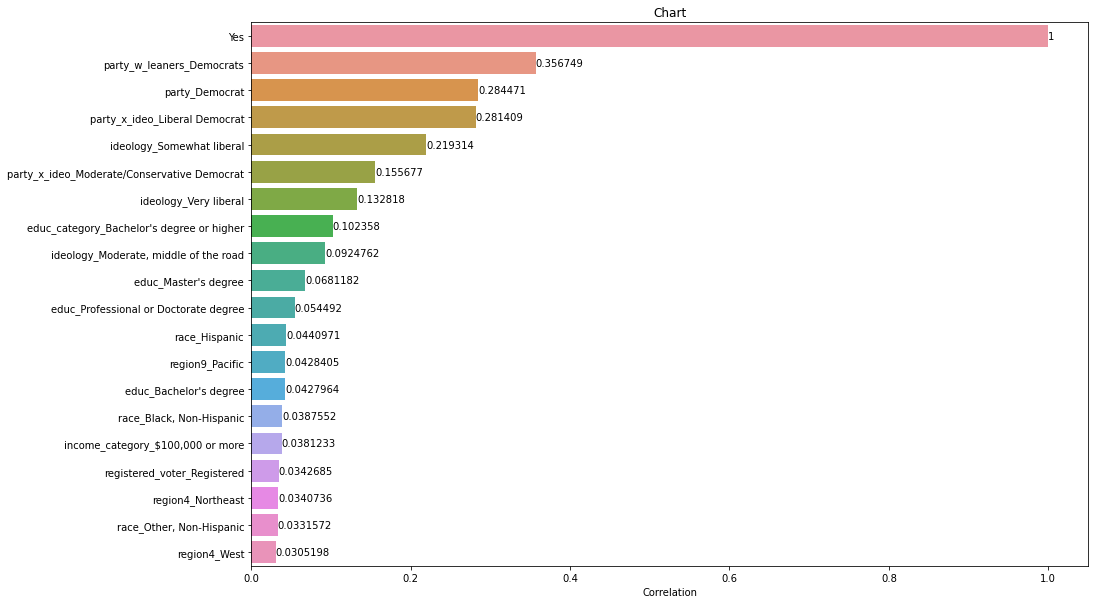

In [29]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Yes', y=top_corr1.index, data=top_corr1, orient='h')
ax.set_xlabel('Correlation')
ax.set_title('Chart')
for i in ax.containers:
    ax.bar_label(i)
;

''

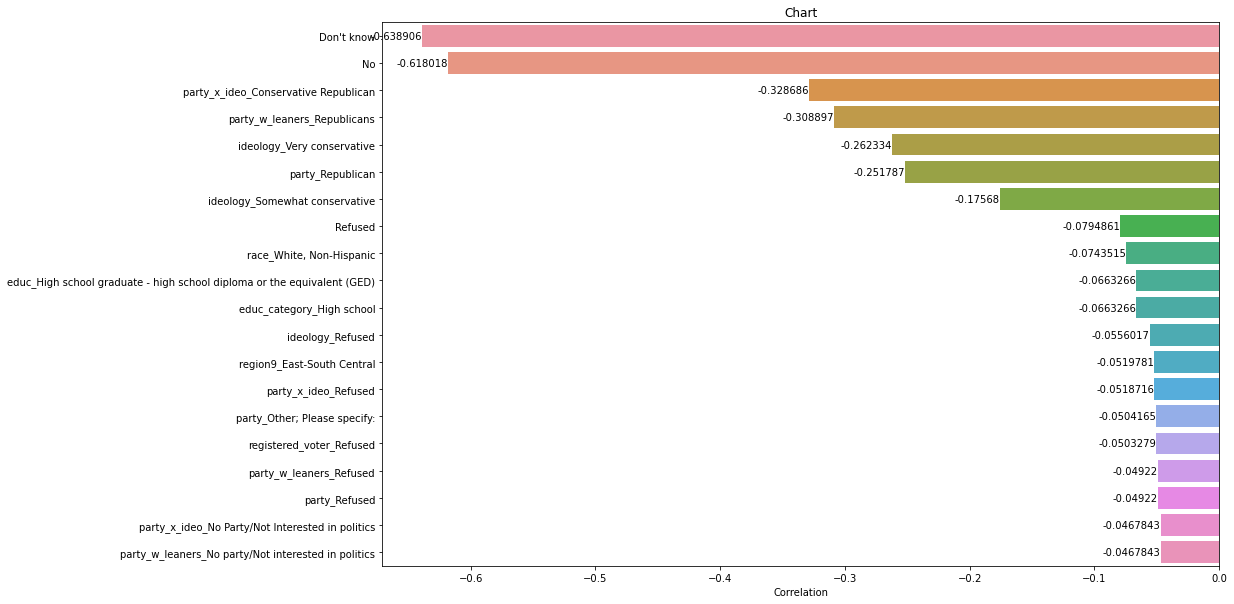

In [30]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Yes', y=top_corr_neg.index, data=top_corr_neg)
ax.set_xlabel('Correlation')
ax.set_title('Chart')
for i in ax.containers:
    ax.bar_label(i)
;

In [31]:
dummies.columns

Index(['generation_Baby Boomers (1946 - 1964)',
       'generation_Generation X (1965 - 1980)',
       'generation_Greatest (Before 1928)',
       'generation_Millennials (1981 - 1996)',
       'generation_Silent (1928 - 1945)', 'generation_iGen‎/Gen Z (1997 - )',
       'educ_10th grade', 'educ_11th grade', 'educ_12th grade no diploma',
       'educ_1st, 2nd, 3rd, or 4th grade', 'educ_5th or 6th grade',
       'educ_7th or 8th grade', 'educ_9th grade', 'educ_Associate's degree',
       'educ_Bachelor's degree',
       'educ_High school graduate - high school diploma or the equivalent (GED)',
       'educ_Master's degree', 'educ_No formal education',
       'educ_Professional or Doctorate degree', 'educ_Some college, no degree',
       'educ_category_Bachelor's degree or higher',
       'educ_category_High school', 'educ_category_Less than high school',
       'educ_category_Some college', 'income_$10,000 to $12,499',
       'income_$100,000 to $124,999', 'income_$12,500 to $14,999',
 

In [32]:
df2['educ_category'].unique()

['High school', 'Less than high school', 'Bachelor's degree or higher', 'Some college']
Categories (4, object): ['Bachelor's degree or higher', 'High school', 'Less than high school', 'Some college']

<AxesSubplot:>

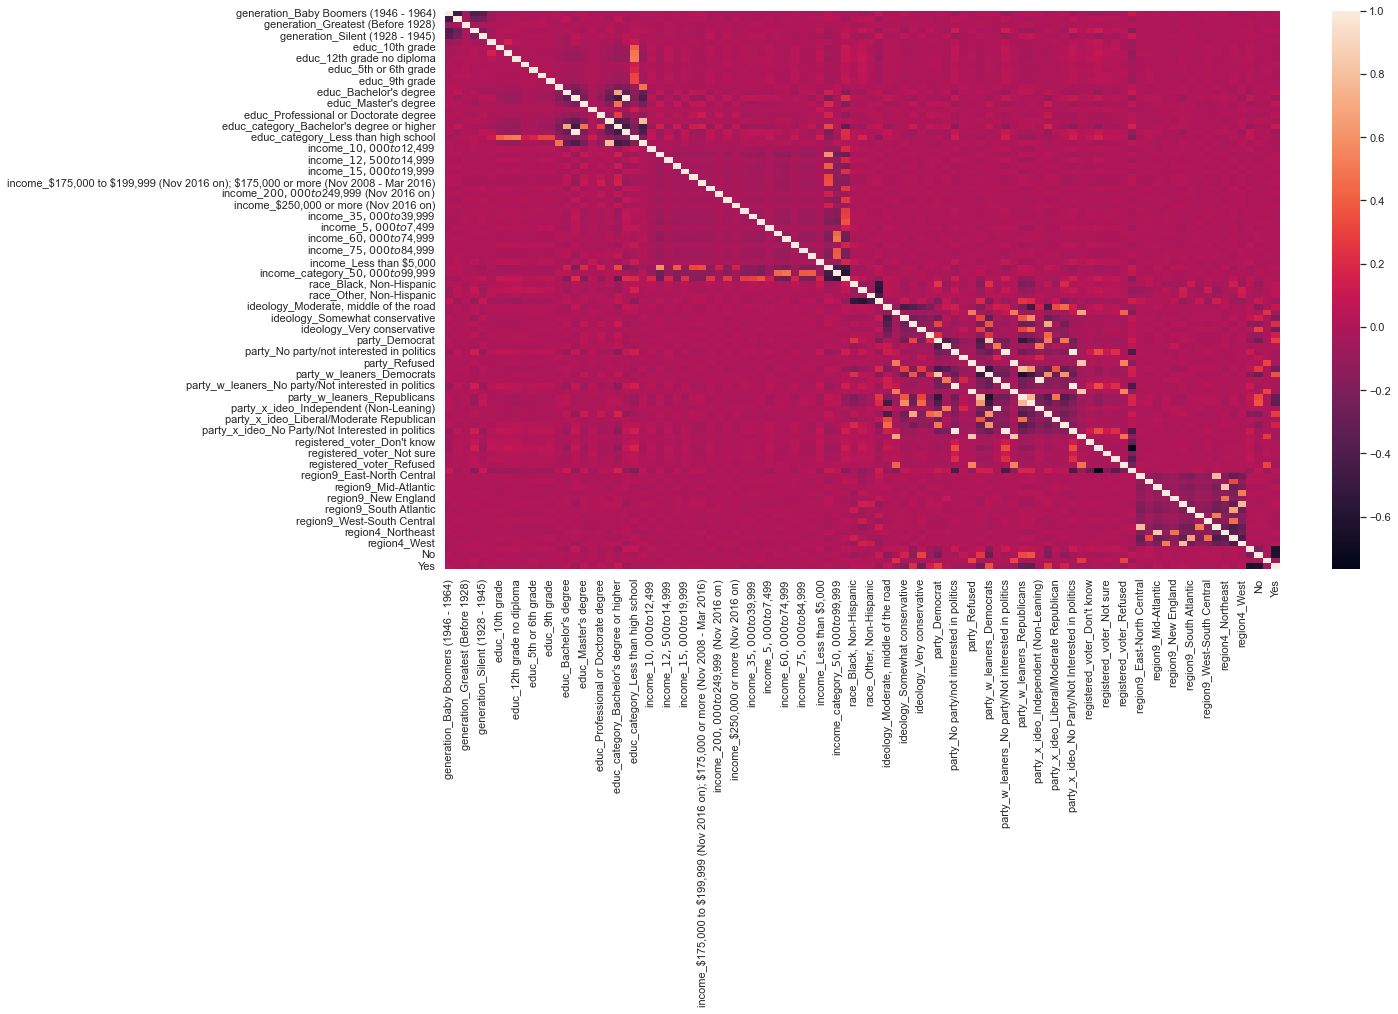

In [33]:
sns.set(rc={'figure.figsize':(18.7,10.27)})
sns.heatmap(dummies.corr())

In [34]:
df2.columns

Index(['generation', 'educ', 'educ_category', 'income', 'income_category',
       'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
       'registered_voter', 'region9', 'region4'],
      dtype='object')

In [35]:
df2['generation'].value_counts(normalize=True)

Baby Boomers (1946 - 1964)    0.408101
Generation X (1965 - 1980)    0.241122
Millennials (1981 - 1996)     0.184333
Silent (1928 - 1945)          0.146993
iGen‎/Gen Z (1997 - )         0.012536
Greatest (Before 1928)        0.006915
Name: generation, dtype: float64

<AxesSubplot:xlabel='generation', ylabel='Count'>

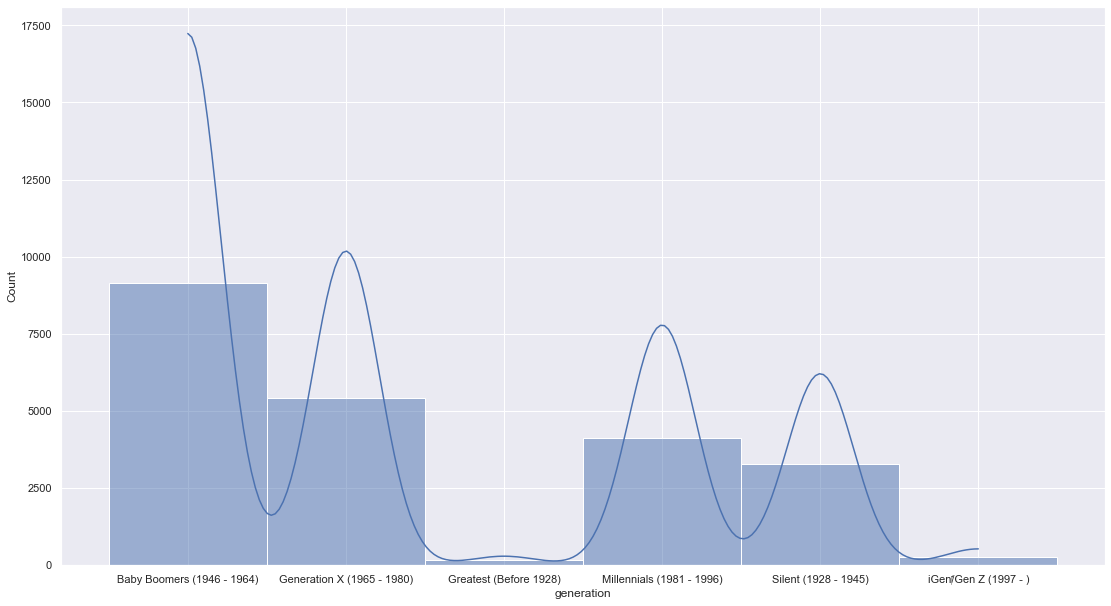

In [68]:
sns.histplot(data=df2, x = 'generation', kde=True)

In [36]:
df2['educ'].value_counts(normalize=True)

High school graduate - high school diploma or the equivalent (GED)    0.282388
Some college, no degree                                               0.207887
Bachelor's degree                                                     0.199143
Master's degree                                                       0.105193
Associate's degree                                                    0.087348
Professional or Doctorate degree                                      0.039659
12th grade no diploma                                                 0.022127
11th grade                                                            0.020030
10th grade                                                            0.014276
9th grade                                                             0.008521
7th or 8th grade                                                      0.008208
5th or 6th grade                                                      0.002587
1st, 2nd, 3rd, or 4th grade                         

<AxesSubplot:xlabel='educ', ylabel='Count'>

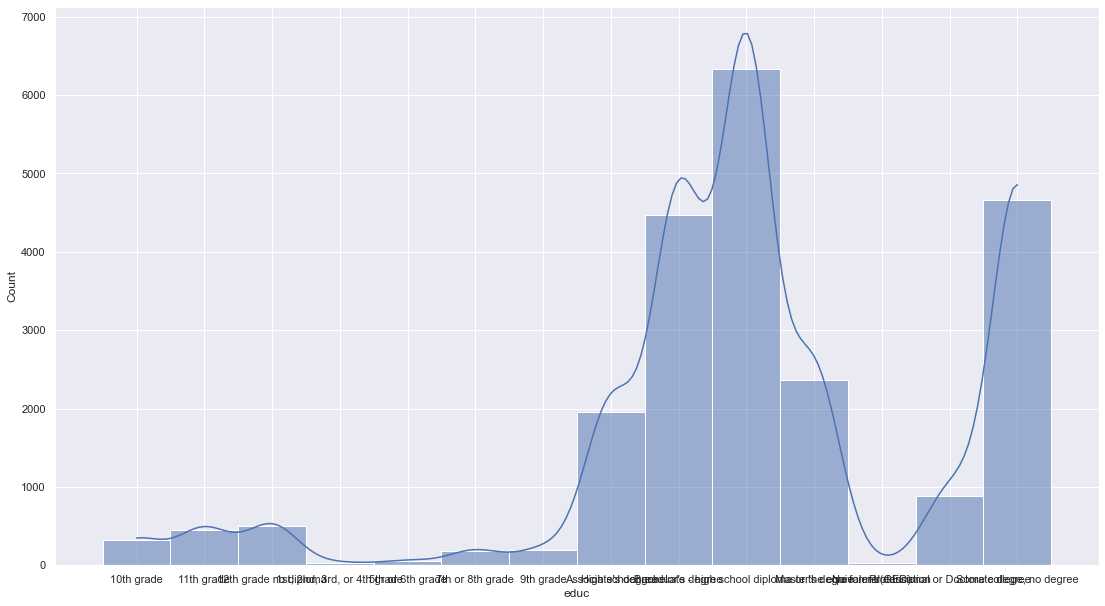

In [67]:
sns.histplot(data=df2, x = 'educ', kde=True)

In [37]:
df2['educ_category'].value_counts(normalize=True)

Bachelor's degree or higher    0.343995
Some college                   0.295236
High school                    0.282388
Less than high school          0.078382
Name: educ_category, dtype: float64

<AxesSubplot:xlabel='educ_category', ylabel='Count'>

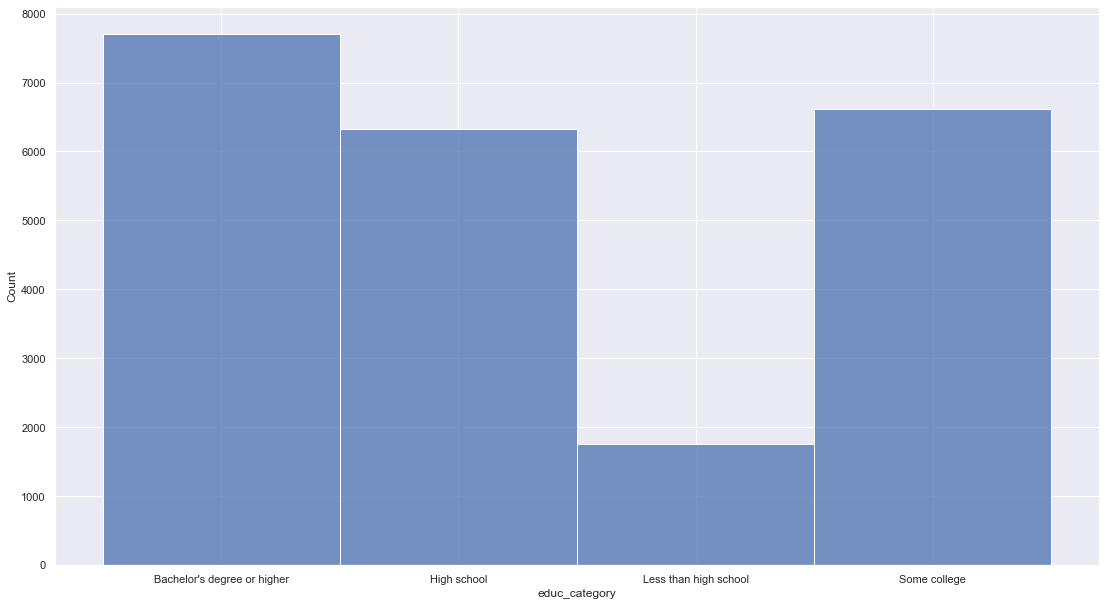

In [65]:
sns.histplot(data=df2, x = 'educ_category')

In [38]:
df2['income'].value_counts(normalize=True)

$100,000 to $124,999                                                          0.114695
$60,000 to $74,999                                                            0.106353
$50,000 to $59,999                                                            0.087884
$40,000 to $49,999                                                            0.078560
$85,000 to $99,999                                                            0.076508
$75,000 to $84,999                                                            0.071958
$125,000 to $149,999                                                          0.054069
$35,000 to $39,999                                                            0.053355
$30,000 to $34,999                                                            0.048091
$25,000 to $29,999                                                            0.046574
$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)    0.042247
$20,000 to $24,999                         

<AxesSubplot:xlabel='income', ylabel='Count'>

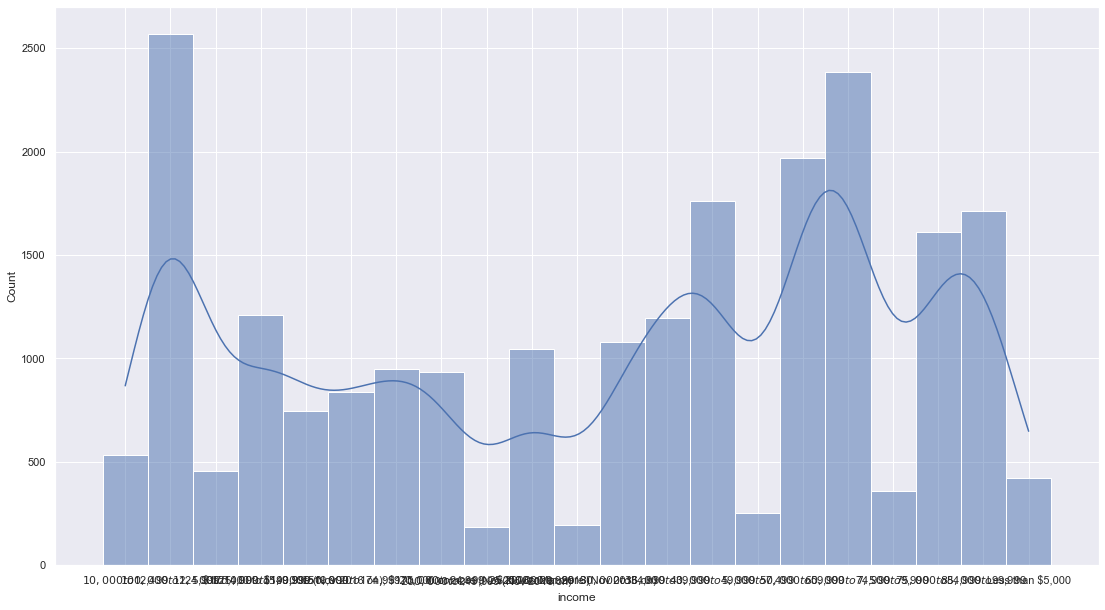

In [69]:
sns.histplot(data=df2, x = 'income', kde=True)

In [39]:
df2['income_category'].value_counts(normalize=True)

Less than $50,000     0.391997
$50,000 to $99,999    0.342702
$100,000 or more      0.265302
Name: income_category, dtype: float64

<AxesSubplot:xlabel='income_category', ylabel='Count'>

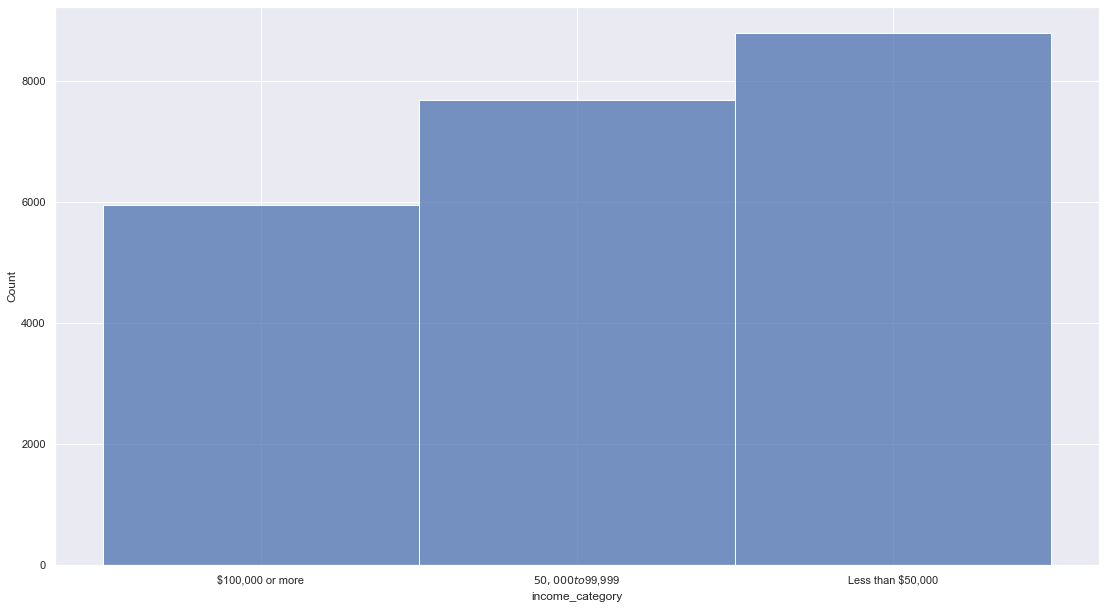

In [71]:
sns.histplot(data=df2, x = 'income_category')

In [40]:
df2['race'].value_counts(normalize=True)

White, Non-Hispanic    0.750669
Hispanic               0.099393
Black, Non-Hispanic    0.087571
Other, Non-Hispanic    0.062366
Name: race, dtype: float64

<AxesSubplot:xlabel='race', ylabel='Count'>

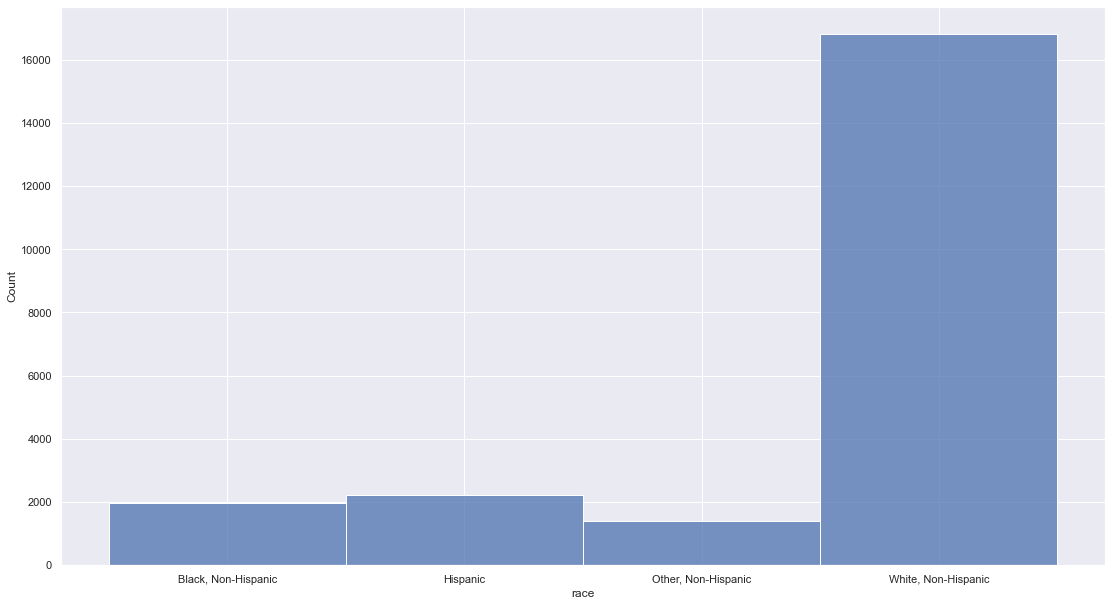

In [72]:
sns.histplot(data=df2, x = 'race')

In [41]:
df2['ideology'].value_counts(normalize=True)

Moderate, middle of the road    0.394763
Somewhat conservative           0.225152
Somewhat liberal                0.180005
Very conservative               0.109698
Very liberal                    0.069682
Refused                         0.020700
Name: ideology, dtype: float64

<AxesSubplot:xlabel='ideology', ylabel='Count'>

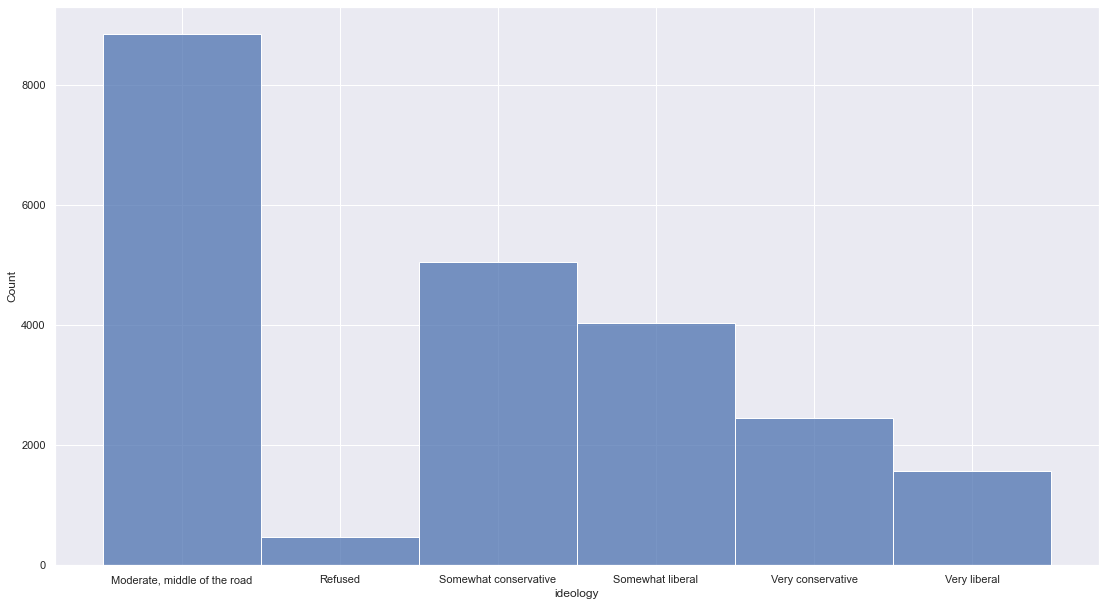

In [73]:
sns.histplot(data=df2, x = 'ideology')

In [42]:
df2['party'].value_counts(normalize=True)

Democrat                               0.330389
Republican                             0.271056
Independent                            0.250178
No party/not interested in politics    0.107914
Other; Please specify:                 0.029443
Refused                                0.011019
Name: party, dtype: float64

<AxesSubplot:xlabel='party', ylabel='Count'>

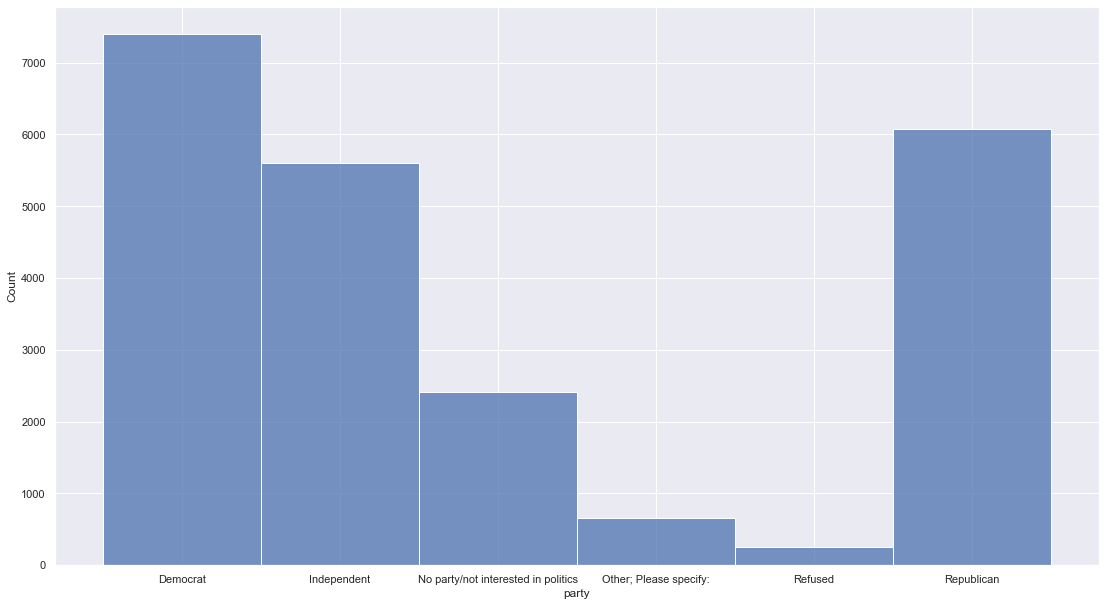

In [74]:
sns.histplot(data=df2, x = 'party')

In [43]:
df2['party_w_leaners'].value_counts(normalize=True)

Democrats                              0.412562
Republicans                            0.364070
No party/Not interested in politics    0.107914
Independent/Other                      0.104434
Refused                                0.011019
Name: party_w_leaners, dtype: float64

<AxesSubplot:xlabel='party_w_leaners', ylabel='Count'>

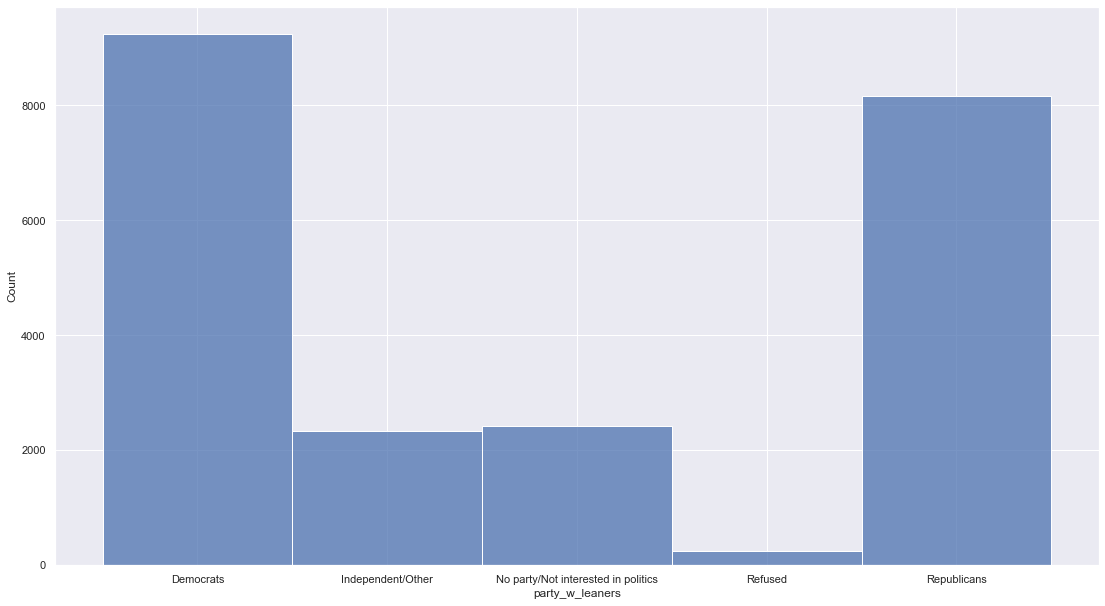

In [75]:
sns.histplot(data=df2, x = 'party_w_leaners')

In [44]:
df2['party_x_ideo'].value_counts(normalize=True)

Conservative Republican                0.245316
Moderate/Conservative Democrat         0.206594
Liberal Democrat                       0.203292
Liberal/Moderate Republican            0.116747
No Party/Not Interested in politics    0.107914
Independent (Non-Leaning)              0.104434
Refused                                0.015703
Name: party_x_ideo, dtype: float64

<AxesSubplot:xlabel='party_x_ideo', ylabel='Count'>

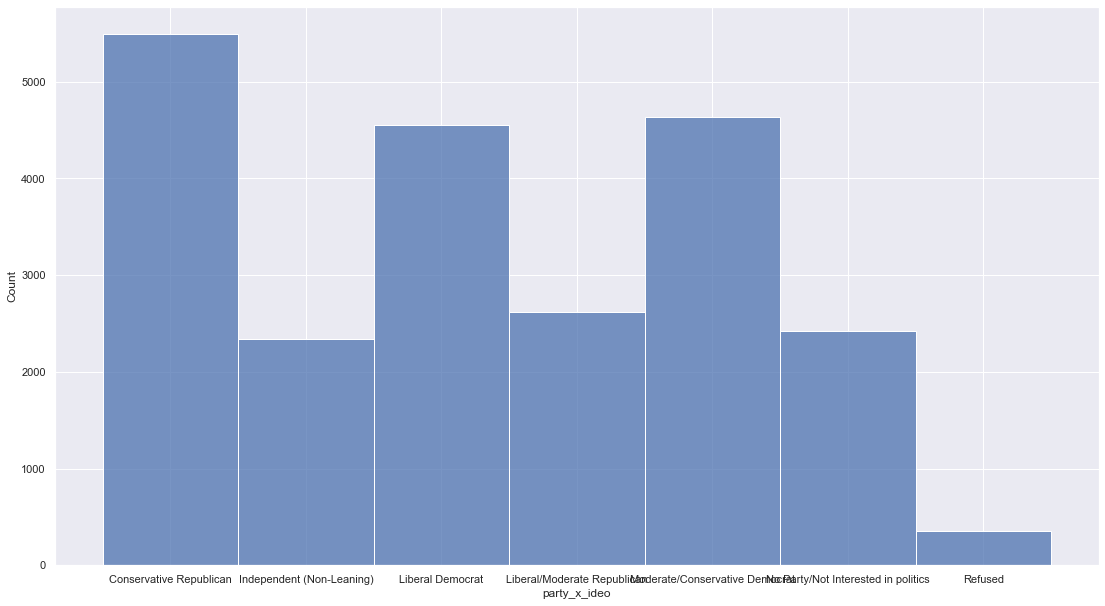

In [76]:
sns.histplot(data=df2, x = 'party_x_ideo')

In [45]:
df2['registered_voter'].value_counts(normalize=True)

Registered              0.840516
Not registered          0.100196
Prefer not to answer    0.026454
Don't know              0.015569
Refused                 0.009904
Not sure                0.007361
Name: registered_voter, dtype: float64

<AxesSubplot:xlabel='registered_voter', ylabel='Count'>

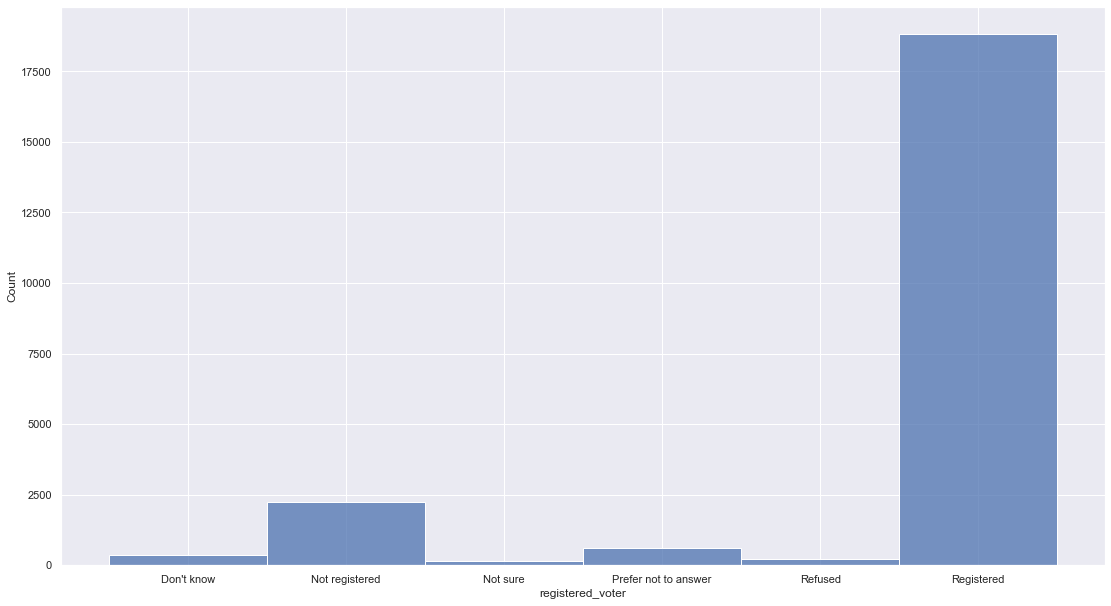

In [77]:
sns.histplot(data=df2, x = 'registered_voter')

In [46]:
df2['region9'].value_counts(normalize=True)

South Atlantic        0.193433
East-North Central    0.159886
Pacific               0.153774
Mid-Atlantic          0.134547
West-South Central    0.102248
West-North Central    0.077266
Mountain              0.075214
East-South Central    0.055362
New England           0.048269
Name: region9, dtype: float64

<AxesSubplot:xlabel='region9', ylabel='Count'>

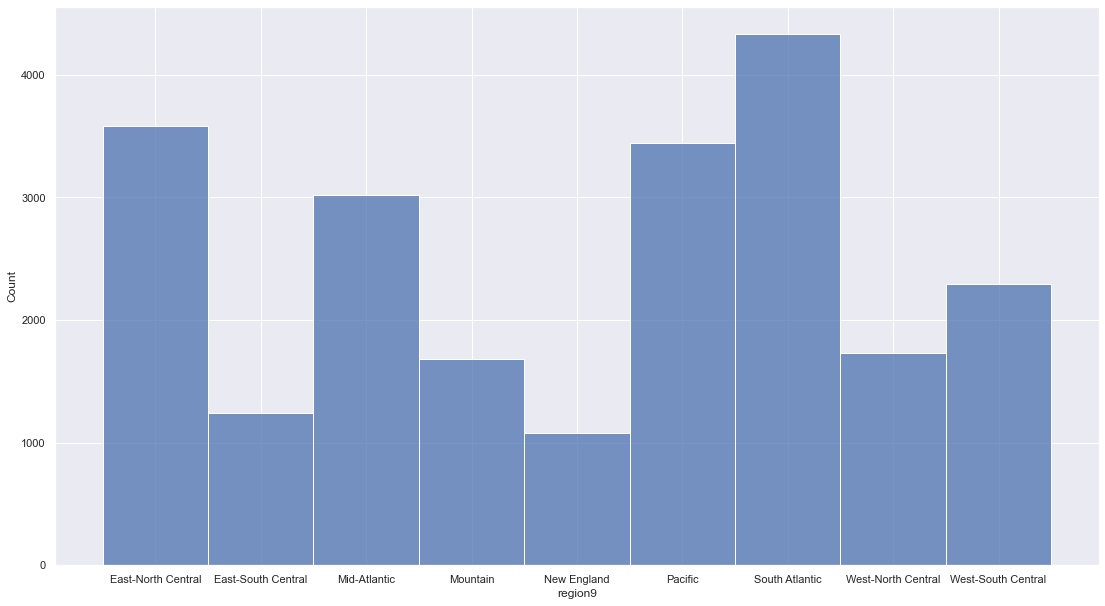

In [78]:
sns.histplot(data=df2, x = 'region9')

In [47]:
df2['region4'].value_counts(normalize=True)

South        0.351044
Midwest      0.237152
West         0.228988
Northeast    0.182816
Name: region4, dtype: float64

<AxesSubplot:xlabel='region4', ylabel='Count'>

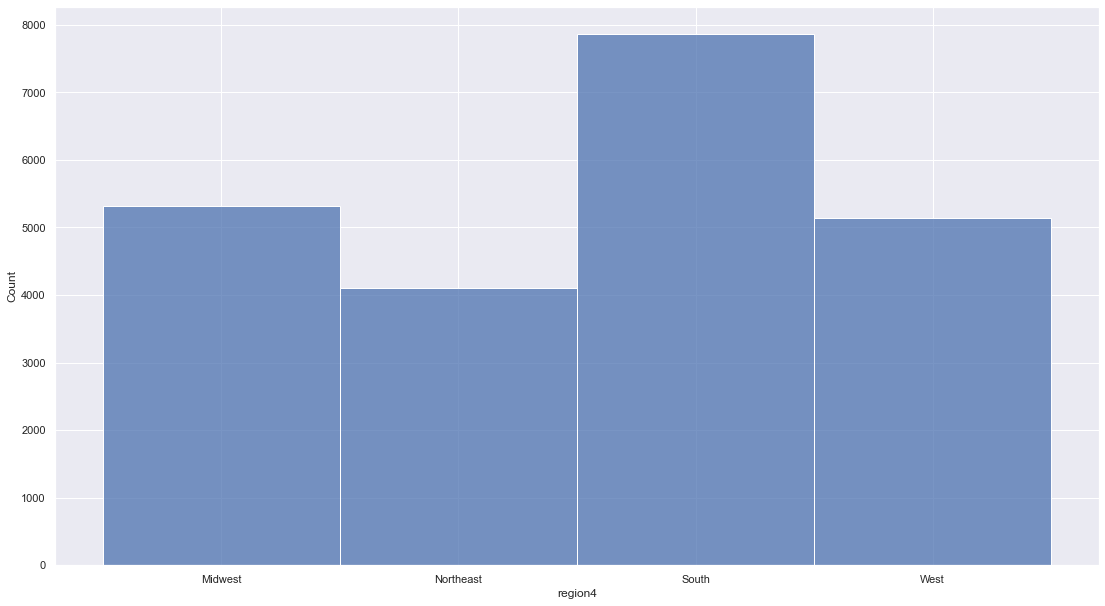

In [79]:
sns.histplot(data=df2, x = 'region4')

In [110]:
test_df = dummies.groupby('Yes').sum()

In [112]:
test_df.columns

Index(['generation_Baby Boomers (1946 - 1964)',
       'generation_Generation X (1965 - 1980)',
       'generation_Greatest (Before 1928)',
       'generation_Millennials (1981 - 1996)',
       'generation_Silent (1928 - 1945)', 'generation_iGen‎/Gen Z (1997 - )',
       'educ_10th grade', 'educ_11th grade', 'educ_12th grade no diploma',
       'educ_1st, 2nd, 3rd, or 4th grade', 'educ_5th or 6th grade',
       'educ_7th or 8th grade', 'educ_9th grade', 'educ_Associate's degree',
       'educ_Bachelor's degree',
       'educ_High school graduate - high school diploma or the equivalent (GED)',
       'educ_Master's degree', 'educ_No formal education',
       'educ_Professional or Doctorate degree', 'educ_Some college, no degree',
       'educ_category_Bachelor's degree or higher',
       'educ_category_High school', 'educ_category_Less than high school',
       'educ_category_Some college', 'income_$10,000 to $12,499',
       'income_$100,000 to $124,999', 'income_$12,500 to $14,999',
 

In [117]:
test_df[['party_Democrat',
         'party_Independent',
         'party_Republican']]

,party_Democrat,party_Independent,party_Republican
Yes,,,
0,1063.0,1810.0,3217.0
1,6343.0,3798.0,2859.0


In [48]:
year_dum = pd.concat([df['year'], dummies], axis=1)

In [49]:
year_dum.groupby('year').sum()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Refused,Yes
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,839.0,546.0,43.0,232.0,504.0,0.0,34.0,40.0,54.0,2.0,7.0,25.0,27.0,172.0,458.0,661.0,175.0,3.0,68.0,438.0,701.0,661.0,192.0,610.0,54.0,168.0,50.0,82.0,62.0,47.0,78.0,127.0,0.0,106.0,0.0,112.0,145.0,219.0,41.0,218.0,268.0,49.0,149.0,172.0,17.0,375.0,807.0,982.0,159.0,133.0,150.0,1722.0,860.0,33.0,522.0,424.0,219.0,106.0,753.0,514.0,173.0,58.0,12.0,654.0,925.0,218.0,173.0,12.0,836.0,550.0,218.0,435.0,282.0,480.0,173.0,26.0,0.0,196.0,37.0,0.0,12.0,1919.0,358.0,150.0,290.0,166.0,112.0,322.0,401.0,161.0,204.0,519.0,402.0,755.0,488.0,376.0,262.0,9.0,1517.0
2010,786.0,701.0,17.0,265.0,256.0,0.0,50.0,52.0,65.0,2.0,5.0,27.0,20.0,157.0,386.0,606.0,157.0,4.0,64.0,430.0,607.0,606.0,225.0,587.0,56.0,188.0,48.0,92.0,77.0,51.0,63.0,97.0,0.0,87.0,0.0,100.0,124.0,183.0,38.0,175.0,239.0,55.0,149.0,162.0,41.0,394.0,725.0,906.0,176.0,200.0,117.0,1532.0,812.0,53.0,473.0,328.0,262.0,97.0,654.0,493.0,248.0,66.0,36.0,528.0,798.0,212.0,248.0,36.0,731.0,519.0,212.0,329.0,205.0,463.0,248.0,49.0,0.0,243.0,52.0,0.0,17.0,1713.0,291.0,146.0,276.0,143.0,92.0,300.0,396.0,163.0,218.0,454.0,368.0,760.0,443.0,409

In [50]:
dummies.columns

Index(['generation_Baby Boomers (1946 - 1964)',
       'generation_Generation X (1965 - 1980)',
       'generation_Greatest (Before 1928)',
       'generation_Millennials (1981 - 1996)',
       'generation_Silent (1928 - 1945)', 'generation_iGen‎/Gen Z (1997 - )',
       'educ_10th grade', 'educ_11th grade', 'educ_12th grade no diploma',
       'educ_1st, 2nd, 3rd, or 4th grade', 'educ_5th or 6th grade',
       'educ_7th or 8th grade', 'educ_9th grade', 'educ_Associate's degree',
       'educ_Bachelor's degree',
       'educ_High school graduate - high school diploma or the equivalent (GED)',
       'educ_Master's degree', 'educ_No formal education',
       'educ_Professional or Doctorate degree', 'educ_Some college, no degree',
       'educ_category_Bachelor's degree or higher',
       'educ_category_High school', 'educ_category_Less than high school',
       'educ_category_Some college', 'income_$10,000 to $12,499',
       'income_$100,000 to $124,999', 'income_$12,500 to $14,999',
 

In [51]:
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=620,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, s.mean(), 2 * s.std()))

In [98]:
rf = RandomForestClassifier(n_jobs=-1,
                            n_estimators = 150,
#                             criterion='entropy',
#                             max_features='sqrt',
#                             min_weight_fraction_leaf=.01,
#                             class_weight='balanced_subsample',
#                             min_impurity_decrease=.02,
#                             oob_score=True,
                            min_samples_split=.1,
                            max_depth = 100,
                            random_state=620)


In [99]:
X = dummies.drop(['Yes', 'No', "Don't know", 'Refused'], axis=1)
y = dummies['Yes']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 620)

In [100]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=0.1, n_estimators=150,
                       n_jobs=-1, random_state=620)

In [101]:
score(rf, 'RF', X_train, y_train)

RF Score: 0.72 +- 0.018


In [102]:
score(rf, 'RF', X_test, y_test)

RF Score: 0.71 +- 0.029


In [103]:
score(rf, 'RF', X, y)

RF Score: 0.72 +- 0.010


In [58]:
feat_imp = pd.DataFrame({'Variable':X.columns,
                            'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)


In [59]:
feat_imp

,Variable,Importance
64,party_w_leaners_Democrats,0.167313
69,party_x_ideo_Conservative Republican,0.165557
68,party_w_leaners_Republicans,0.115659
56,ideology_Very conservative,0.083225
71,party_x_ideo_Liberal Democrat,0.081229
58,party_Democrat,0.073526
63,party_Republican,0.055566
55,ideology_Somewhat liberal,0.054004
54,ideology_Somewhat conservative,0.030036
73,party_x_ideo_Moderate/Conservative Democrat,0.025626


In [60]:
year_dum.describe()

,generation_Baby Boomers (1946 - 1964),generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",educ_category_Bachelor's degree or higher,educ_category_High school,educ_category_Less than high school,educ_category_Some college,"income_$10,000 to $12,499","income_$100,000 to $124,999","income_$12,500 to $14,999","income_$125,000 to $149,999","income_$15,000 to $19,999","income_$150,000 to $174,999","income_$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)","income_$20,000 to $24,999","income_$200,000 to $249,999 (Nov 2016 on)","income_$25,000 to $29,999","income_$250,000 or more (Nov 2016 on)","income_$30,000 to $34,999","income_$35,000 to $39,999","income_$40,000 to $49,999","income_$5,000 to $7,499","income_$50,000 to $59,999","income_$60,000 to $74,999","income_$7,500 to $9,999","income_$75,000 to $84,999","income_$85,000 to $99,999","income_Less than $5,000","income_category_$100,000 or more","income_category_$50,000 to $99,999","income_category_Less than $50,000","race_Black, Non-Hispanic",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic","ideology_Moderate, middle of the road",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Democrat,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,party_w_leaners_Democrats,party_w_leaners_Independent/Other,party_w_leaners_No party/Not interested in politics,party_w_leaners_Refused,party_w_leaners_Republicans,party_x_ideo_Conservative Republican,party_x_ideo_Independent (Non-Leaning),party_x_ideo_Liberal Democrat,party_x_ideo_Liberal/Moderate Republican,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,party_x_ideo_Refused,registered_voter_Don't know,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region9_East-North Central,region9_East-South Central,region9_Mid-Atlantic,region9_Mountain,region9_New England,region9_Pacific,region9_South Atlantic,region9_West-North Central,region9_West-South Central,region4_Midwest,region4_Northeast,region4_South,region4_West,Don't know,No,Refused,Yes
count,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.00000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,2